Analysis of the dependence of the optimization result on the value of the rank (r), the size of the batch (k), and the number of selected candidates (k_top) for the discretized (n = 16) multivariate (d = 50) analytic Ashley function. See also `demo/demo_func.py`.

# Imports

In [1]:
# Run "pip install numpy matplotlib seaborn" before.

In [2]:
import matplotlib as mpl
import numpy as np
from time import perf_counter as tpc


mpl.rcParams.update({
    'font.family': 'normal',
    'font.serif': [],
    'font.sans-serif': [],
    'font.monospace': [],
    'font.size': 12,
    'text.usetex': False,
})


import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'


from protes import protes

# Helpers

In [3]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='best', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

# Target function

In [4]:
def func_build(d, n):
    """Ackley function. See https://www.sfu.ca/~ssurjano/ackley.html."""

    a = -32.768         # Grid lower bound
    b = +32.768         # Grid upper bound

    par_a = 20.         # Standard parameter values for Ackley function
    par_b = 0.2
    par_c = 2.*np.pi

    def func(I):
        """Target function: y=f(I); [samples,d] -> [samples]."""
        X = I / (n - 1) * (b - a) + a

        y1 = np.sqrt(np.sum(X**2, axis=1) / d)
        y1 = - par_a * np.exp(-par_b * y1)

        y2 = np.sum(np.cos(par_c * X), axis=1)
        y2 = - np.exp(y2 / d)

        y3 = par_a + np.exp(1.)

        return y1 + y2 + y3

    return func

In [5]:
d = 50               # Dimension
n = 16               # Mode size
f = func_build(d, n) # Target function

# Params

In [6]:
# Number of requests to the objective function:
m = int(1.E+4)

# The batch size for optimization:
k_list = [25, 50, 75, 100]

# Number of selected candidates for all batches:
k_top_list = [1, 5, 10, 15]

# TT-rank of the probability TT-tensor:
r_list = [1, 3, 5, 7]

# Computations

In [7]:
result = {}
for r in r_list:
    result[r] = {}
    for k in k_list:
        result[r][k] = {}
        for k_top in k_top_list:
            t = tpc()
            i_opt, y = protes(f, d, n, m, k=k, k_top=k_top, r=r)
            t = tpc() - t
            print(f'>>> r = {r:-5d} | k = {k:-5d} | k_top = {k_top:-5d} | y = {y:-12.6e} | t = {t:-8.2f}')
            result[r][k][k_top] = {'y': y, 't': t}

>>> r =     1 | k =    25 | k_top =     1 | y = 2.045449e+01 | t =    82.58
>>> r =     1 | k =    25 | k_top =     5 | y = 2.081464e+01 | t =    80.61
>>> r =     1 | k =    25 | k_top =    10 | y = 2.084645e+01 | t =    81.56
>>> r =     1 | k =    25 | k_top =    15 | y = 2.090065e+01 | t =    80.63
>>> r =     1 | k =    50 | k_top =     1 | y = 2.048395e+01 | t =    42.30
>>> r =     1 | k =    50 | k_top =     5 | y = 2.067248e+01 | t =    43.18
>>> r =     1 | k =    50 | k_top =    10 | y = 2.080482e+01 | t =    43.91
>>> r =     1 | k =    50 | k_top =    15 | y = 2.081238e+01 | t =    42.96
>>> r =     1 | k =    75 | k_top =     1 | y = 2.040174e+01 | t =    30.20
>>> r =     1 | k =    75 | k_top =     5 | y = 2.064740e+01 | t =    30.55
>>> r =     1 | k =    75 | k_top =    10 | y = 2.072599e+01 | t =    30.46
>>> r =     1 | k =    75 | k_top =    15 | y = 2.078091e+01 | t =    30.71
>>> r =     1 | k =   100 | k_top =     1 | y = 2.048031e+01 | t =    24.17
>>> r =     

# Plot results

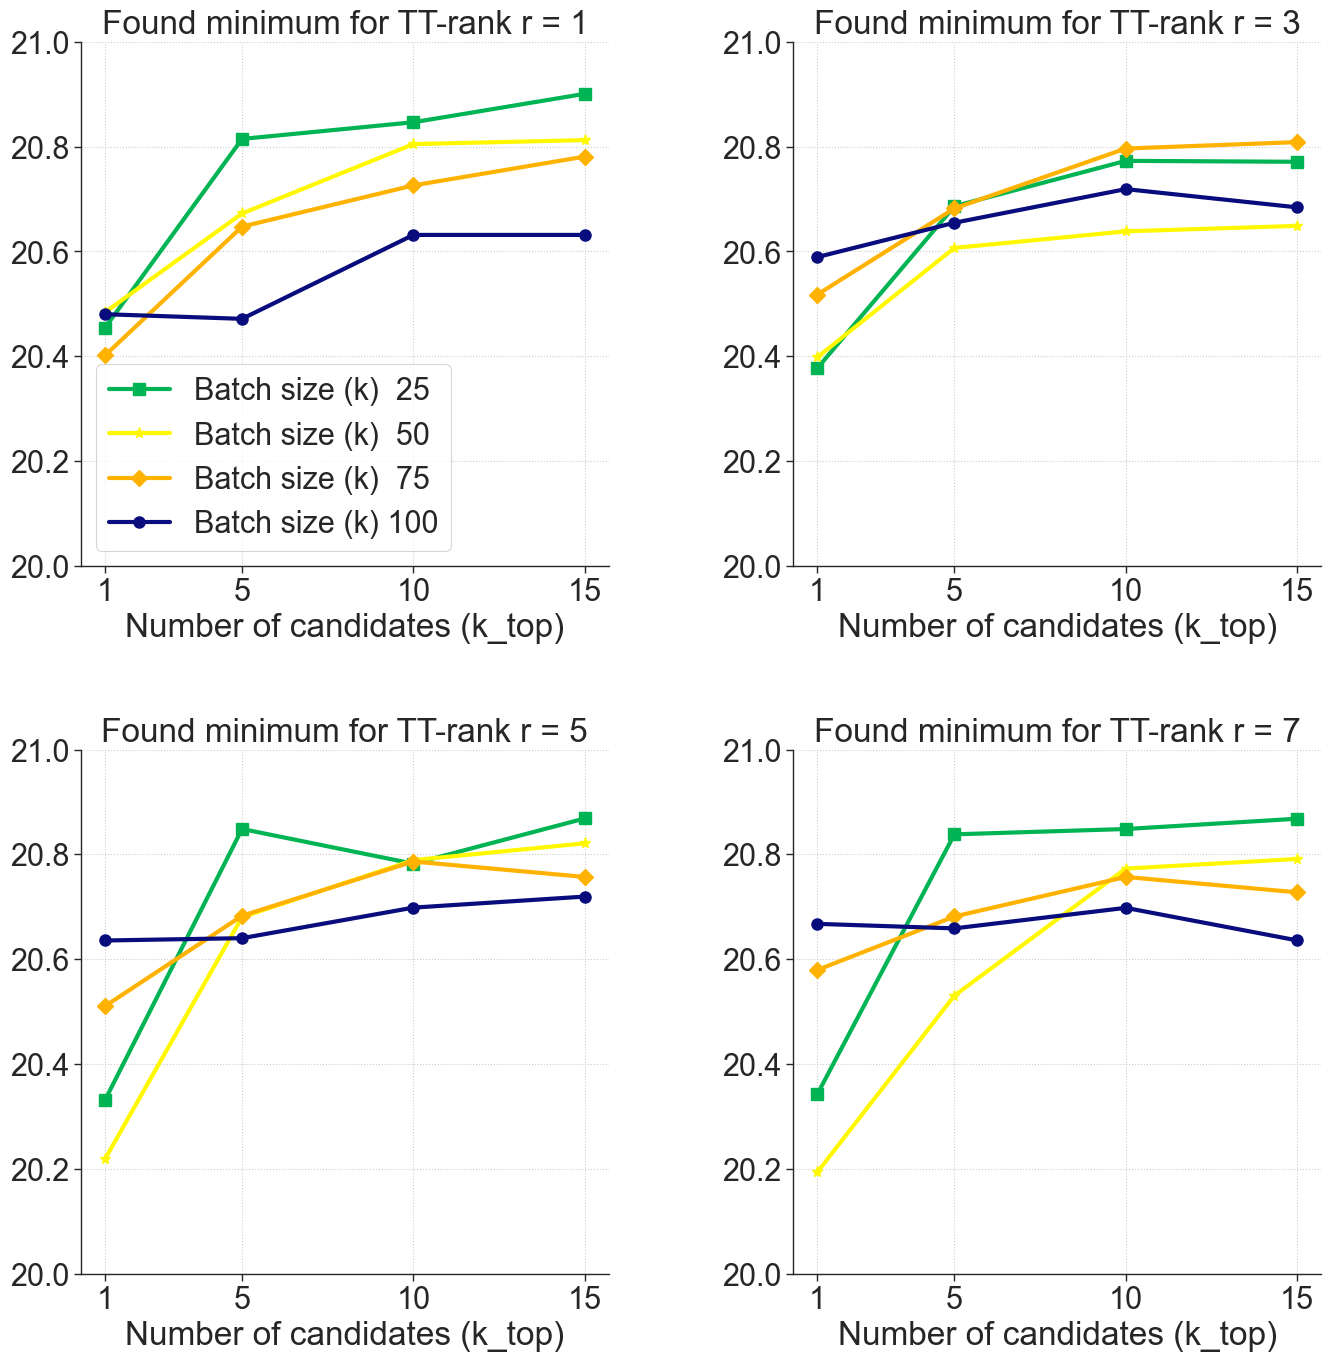

In [ ]:
colors = ['#00B454', '#FFF800', '#FFB300', '#080c7c', '#8d230d']
marker = ['s', '*', 'D', 'o', 'p']
    
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
axs = axs.flatten()

num = -1
for r in r_list:
    num += 1
    ax = axs[num]
    ax.set_xlabel('Number of candidates (k_top)')
    ax.set_title(f'Found minimum for TT-rank r = {r}')    
    
    for i, k in enumerate(k_list):
        x = k_top_list
        y = [result[r][k][x_cur]['y'] for x_cur in x]
        ax.plot(x, y, label=f'Batch size (k) {k:-3d}',
            marker=marker[i], markersize=8, linewidth=3, color=colors[i])
    
    prep_ax(ax, xlog=False, ylog=False, leg=(r == r_list[0]),
        xint=True, xticks=k_top_list)
    ax.set_ylim(20, 21)

plt.savefig('check_ackley.png', bbox_inches='tight')

---